In [1]:
# Check your Python version
!python --version

Python 3.9.6


In [2]:
"""
Code borrowed from: 
"https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer"
"https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/blob/master/saved_models/Emotion_Voice_Detection_Model.h5"
"https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/blob/master/AudioRecorder.ipynb"
"""

# Record and save a 4s recording as a WAV file named "output10", in the same location as this notebook file

import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


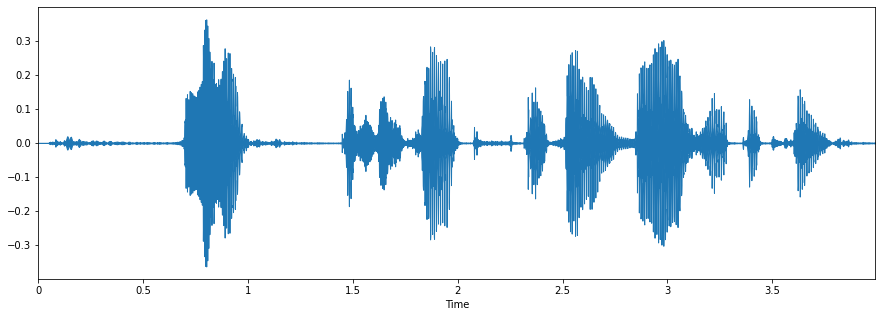

In [3]:
# Import our recording ("output10.wav") and plot the waveform

import librosa
from librosa.display import waveplot
import matplotlib.pyplot as plt

data, sampling_rate = librosa.load('output10.wav')


import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
waveplot(data, sr=sampling_rate)

In [4]:
# Extract audio features (MFCCs) into a Numpy array
import numpy as np

#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [5]:
# Transfer data from Numpy array to Pandas dataframe
livedf2= pd.DataFrame(data=livedf2)
livedf2

,0
0,-31.652052
1,-30.303568
2,-31.022724
3,-32.367138
4,-29.788670
...,...
211,-9.223310
212,-9.772785
213,-9.993433
214,-7.448012


In [6]:
# Transpose dataframe so that rows become columns and columns become rows
livedf2 = livedf2.stack().to_frame().T

In [7]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-31.652052,-30.303568,-31.022724,-32.367138,-29.78867,-28.168821,-27.522552,-29.084471,-30.231052,-31.257486,...,-7.644399,-7.982239,-8.042425,-8.749363,-9.19003,-9.22331,-9.772785,-9.993433,-7.448012,-4.450022


In [8]:
# Take data into Numpy array and add another dimension
twodim= np.expand_dims(livedf2, axis=2)
twodim

array([[[-31.652052 ],
        [-30.303568 ],
        [-31.022724 ],
        [-32.367138 ],
        [-29.78867  ],
        [-28.168821 ],
        [-27.522552 ],
        [-29.08447  ],
        [-30.231052 ],
        [-31.257486 ],
        [-30.25504  ],
        [-31.989515 ],
        [-31.452517 ],
        [-31.458284 ],
        [-30.47768  ],
        [-24.540865 ],
        [-15.141841 ],
        [-12.574884 ],
        [-12.708077 ],
        [-15.408715 ],
        [-16.594627 ],
        [-17.729744 ],
        [-19.6866   ],
        [-18.037384 ],
        [-16.311245 ],
        [-17.024563 ],
        [-16.732937 ],
        [-15.636948 ],
        [-17.485119 ],
        [-17.12311  ],
        [-15.648919 ],
        [-16.19253  ],
        [-14.163947 ],
        [-12.137517 ],
        [-10.373302 ],
        [ -8.962104 ],
        [ -8.244979 ],
        [ -8.681682 ],
        [ -9.786108 ],
        [-10.045281 ],
        [-11.675364 ],
        [-13.96495  ],
        [-15.469497 ],
        [-1

In [9]:
# Load in the pretrained H5 model called "Emotion_Voice_Detection_Model", the one we downloaded from "https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer"
import tensorflow as tf
loaded_model = tf.keras.models.load_model('Emotion_Voice_Detection_Model.h5')

In [10]:
# Let the H5 model make the prediction on our audio features (MFCCs)
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 1s 1s/step


In [11]:
# Print out the percentage values of the output layer (Softmax output)
livepreds

array([[3.5595694e-21, 0.0000000e+00, 3.2443828e-25, 4.5398223e-28,
        5.2143529e-35, 3.1940490e-01, 3.3611056e-22, 6.2944758e-01,
        7.9471869e-03, 4.3200381e-02]], dtype=float32)

In [12]:
# Print out the label predicted by our H5 model
livepreds1=livepreds.argmax(axis=1)
print(livepreds1)

[7]


In [13]:
# Make sure the label is in integer format
liveabc = livepreds1.astype(int).flatten()
print(liveabc)

[7]


In [14]:
# Define the encoding of the ten string labels into their respective integer labels (0-9), according to the order of the original H5 project ("https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer")
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
str_labels = np.array(["female_angry", "female_calm", "female_fearful", "female_happy", "female_sad", "male_angry", "male_calm", "male_fearful", "male_happy", "male_sad"])
int_labels = lb.fit_transform(str_labels)
print(int_labels)

[0 1 2 3 4 5 6 7 8 9]


In [15]:
# Convert integer label to string label
livepredictions = (lb.inverse_transform((liveabc)))
print(livepredictions)

['male_fearful']
